importando bibliotecas

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
from scipy import optimize as op

# primeira coleção de ativos

In [199]:
#taxa livre de risco
rf=0.0037
#numero de simulações da carteira
num_sim=100000
#base de dados com os retornos de cada ação
carteira=pd.read_excel(r'C:\Users\rique\OneDrive - Insper - Institudo de Ensino e Pesquisa\Pasta1.xlsx')
#data como índice da tabela
carteira.set_index(['Data'],inplace=True)
#salvando os tickers em uma lista
tickers=list(carteira.columns)
#savando a contagem do número de ações em uma variável
num_acoes=len(tickers)
#tabela que contém a primeira coleção de ativos
carteira

,BHP Group,AGRO3 - Brasil Agro,JBSS3 - JBS,MTZ - MasTec,RIO - Rio Tinto,VIXM - Volatility Index,BTG Pactual Tesouro IPCA,Treasury Yield EUA,ABEV3 - Ambev,BRFS3 - BRF,ELET3 - Eletrobrás,LPSB3 - Lopes Royal,WY - Weyerhauser,DIS -Disney,TIP - iShares TIPS Bonds ETF
Data,,,,,,,,,,,,,,,
Fev-2012,-0.019293,-0.014706,0.142410,0.079804,-0.043655,0.002092,0.017614,NaN,0.117692,0.037572,0.040669,0.084888,0.050846,0.079434,-0.005781
Mar-2012,-0.057537,-0.203980,0.027397,0.028425,-0.023538,-0.154018,0.018123,0.008737,0.098186,0.002786,-0.082441,0.061909,0.049306,0.042629,-0.008595
Abr-2012,0.026243,-0.055000,0.000000,-0.038695,0.008635,-0.018421,0.041829,0.007152,0.071143,-0.031944,-0.049008,-0.112011,-0.071168,-0.015304,0.017845
Mai-2012,-0.171871,-0.022487,-0.273333,-0.059804,-0.229178,0.109439,0.022064,0.007223,-0.071503,-0.099283,-0.113414,0.138075,-0.014664,0.060311,0.019464
Jun-2012,0.061271,0.008119,0.106422,-0.080122,0.106201,-0.108594,-0.004992,0.006013,0.015305,-0.028187,0.073851,-0.089674,0.123054,0.061037,-0.006686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ago-2021,-0.158096,-0.034268,0.004232,-0.096710,-0.069607,-0.035973,-0.011043,0.004122,0.027644,-0.085870,-0.065093,0.009456,0.067299,0.029997,-0.001641
Set-2021,-0.137988,0.091398,0.189285,-0.056430,-0.109897,0.057610,-0.001658,0.004359,-0.105263,0.156704,0.023386,-0.362998,-0.007298,-0.066906,-0.007800
Out-2021,0.024664,-0.087636,0.053412,0.033032,-0.053128,-0.058805,-0.025613,0.005002,0.110458,-0.142488,-0.121527,-0.102941,0.018453,-0.000591,0.011096


# calculadando o retorno esperado da carteira

In [200]:
retorno_mensal_esperado=carteira.mean()
retorno_mensal_esperado

BHP Group                       0.005404
AGRO3 - Brasil Agro             0.016211
JBSS3 - JBS                     0.023053
MTZ - MasTec                    0.020067
RIO - Rio Tinto                 0.009163
VIXM - Volatility Index        -0.014052
BTG Pactual Tesouro IPCA        0.008871
Treasury Yield EUA              0.006432
ABEV3 - Ambev                   0.008301
BRFS3 - BRF                     0.003434
ELET3 - Eletrobrás              0.021774
LPSB3 - Lopes Royal            -0.003005
WY - Weyerhauser                0.012366
DIS -Disney                     0.014857
TIP - iShares TIPS Bonds ETF    0.002319
dtype: float64

# calculando a matriz de covariãncia

In [201]:
cov_carteira=carteira.cov()
cov_carteira

,BHP Group,AGRO3 - Brasil Agro,JBSS3 - JBS,MTZ - MasTec,RIO - Rio Tinto,VIXM - Volatility Index,BTG Pactual Tesouro IPCA,Treasury Yield EUA,ABEV3 - Ambev,BRFS3 - BRF,ELET3 - Eletrobrás,LPSB3 - Lopes Royal,WY - Weyerhauser,DIS -Disney,TIP - iShares TIPS Bonds ETF
BHP Group,0.006915,0.000802,0.001196,0.002783,0.005696,-0.002722,0.000566,-0.000031,0.001600,0.002081,0.003159,0.001239,0.002322,0.002274,0.000245
AGRO3 - Brasil Agro,0.000802,0.008230,0.001356,0.001458,0.001109,-0.001011,0.000280,-0.000029,-0.000112,0.001086,0.001888,0.002309,0.001620,0.000989,0.000053
JBSS3 - JBS,0.001196,0.001356,0.012784,0.002155,0.000737,-0.001961,0.000179,-0.000028,0.001520,0.005040,0.005395,0.000750,0.002048,0.001785,0.000064
MTZ - MasTec,0.002783,0.001458,0.002155,0.010880,0.002152,-0.003426,0.000299,-0.000025,0.001551,0.002412,0.003197,0.003795,0.003767,0.002663,-0.000095
RIO - Rio Tinto,0.005696,0.001109,0.000737,0.002152,0.006280,-0.001830,0.000406,-0.000028,0.001272,0.001321,0.002577,0.000157,0.001850,0.001897,0.000085
VIXM - Volatility Index,-0.002722,-0.001011,-0.001961,-0.003426,-0.001830,0.009100,-0.000577,-0.000038,-0.002715,-0.004007,-0.001901,-0.003321,-0.004501,-0.003262,-0.000162
BTG Pactual Tesouro IPCA,0.000566,0.000280,0.000179,0.000299,0.000406,-0.000577,0.000494,0.000009,0.000438,0.000482,0.001426,0.001287,0.000579,0.000275,0.000111
Treasury Yield EUA,-0.000031,-0.000029,-0.000028,-0.000025,-0.000028,-0.000038,0.000009,0.000009,0.000003,-0.000011,0.000030,-0.000015,-0.000016,-0.000013,-0.000003
ABEV3 - Ambev,0.001600,-0.000112,0.001520,0.001551,0.001272,-0.002715,0.000438,0.000003,0.004397,0.002811,0.001720,0.003412,0.001503,0.001376,0.000089
BRFS3 - BRF,0.002081,0.001086,0.005040,0.002412,0.001321,-0.004007,0.000482,-0.000011,0.002811,0.012639,0.005120,0.004673,0.002669,0.002773,0.000095


# criando listas para salvar os pesos, o retorno , o desvio padão e o índice de sharpe da simulação das carteiras e simulando carteiras

In [202]:
peso_acoes=[]
retorno_cart=[]
desvio_cart=[]
sharpe_index=[]
for carteiras in range(num_sim):
    #criando um vetor randõmicos de números, com 15 posições
    a=-1
    b=1
    peso=(b-a)*np.random.random(num_acoes)+a
    #determinando o peso representativo de cada ativo, para isso divimos cada peso pela soma do vetor pela soma de todos
    peso=peso/np.sum(peso)
    #calculando o retorno da carteira multiplicando o peso dos ativos pelo retorno de cada um
    retorno=np.dot(peso,retorno_mensal_esperado)
    #desvio padrão da carteira: multiplicando a matriz de pesos pela matriz de covariância e em sequência multiplica-se o resultado pela matiz transposta do peso
    desvio=np.sqrt(np.matmul(peso.T,np.matmul(peso,np.array(cov_carteira))))
    #calculando o índice de sharpe para a carteira, já considerando o ativo livre de risco rf
    sharpe=(retorno-rf)/desvio
    #salvando as informações nas listas criadas anteriormente
    peso_acoes.append(peso)
    retorno_cart.append(retorno)
    desvio_cart.append(desvio)
    sharpe_index.append(sharpe)

# criando um data frame com as informações de cada carteira aleatória gerada anteriormente;peso, retorno, desvio e o sharpe

In [203]:
dicionario={'Retorno':retorno_cart,'Desvio Padrão': desvio_cart,'Sharpe': sharpe_index}

In [204]:
for counter,ticker in enumerate(tickers):
    dicionario[ticker + ' peso'] = [peso[counter] for peso in peso_acoes]
    carteira2 = pd.DataFrame(dicionario)

carteira2

,Retorno,Desvio Padrão,Sharpe,BHP Group peso,AGRO3 - Brasil Agro peso,JBSS3 - JBS peso,MTZ - MasTec peso,RIO - Rio Tinto peso,VIXM - Volatility Index peso,BTG Pactual Tesouro IPCA peso,Treasury Yield EUA peso,ABEV3 - Ambev peso,BRFS3 - BRF peso,ELET3 - Eletrobrás peso,LPSB3 - Lopes Royal peso,WY - Weyerhauser peso,DIS -Disney peso,TIP - iShares TIPS Bonds ETF peso
0,0.006226,0.105641,0.023911,0.123657,-0.425495,0.301734,0.143651,0.444134,-0.072733,0.269068,-0.268990,-0.141019,0.361692,-0.320001,0.248356,-0.245329,0.494222,0.087053
1,0.006028,0.076749,0.030330,0.287637,-0.377014,0.231151,0.229714,-0.025320,0.120260,0.428795,0.428719,0.061373,-0.064040,-0.196359,-0.247047,0.349638,-0.362534,0.135026
2,0.006099,0.353022,0.006794,-1.494457,-0.504362,-1.667801,-0.841392,0.698736,-0.667930,1.580611,0.659540,0.819758,0.646644,1.862853,-0.004488,-0.181349,-0.314748,0.408385
3,-0.026154,0.290463,-0.102781,-0.491637,-1.169470,0.282817,0.705726,-0.427927,0.453589,0.355935,-1.020020,-0.521452,0.131373,-1.263981,1.497582,1.207835,0.519974,0.739654
4,0.154802,0.817068,0.184931,-0.118059,3.480044,-1.438874,4.148583,-1.618871,-1.807205,-0.087672,-2.444332,-1.059456,1.382244,4.051994,-3.549509,-2.334122,-1.328237,3.723471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.005446,0.117226,0.014896,-0.256285,0.258945,-0.416124,0.380953,0.068145,-0.348928,0.283133,0.576190,0.236499,0.468780,-0.518698,-0.006331,-0.028218,0.014925,0.287015
99996,0.024011,0.300182,0.067661,0.801534,-0.360592,-0.288017,1.323139,-1.301775,-0.650625,1.459379,-0.381001,0.439325,0.633192,-1.125552,-0.802019,0.267909,0.684465,0.300639
99997,0.004961,0.134222,0.009398,0.270213,-0.550033,0.537276,0.438782,0.188976,0.408201,0.213532,-0.385128,-0.130782,0.567867,-0.374723,-0.189473,-0.366699,0.495422,-0.123432
99998,-0.053835,0.209079,-0.275185,-0.012914,-0.538347,-0.223250,-0.309094,0.673812,1.149386,-1.140995,-0.086955,0.488125,0.610062,-0.574025,0.619817,-1.113645,0.444528,1.013497


# plotando o sharpe de todas as carteiras simuladas em gráfico de retorno por desvio padrão

<AxesSubplot:xlabel='Desvio Padrão', ylabel='Retorno'>

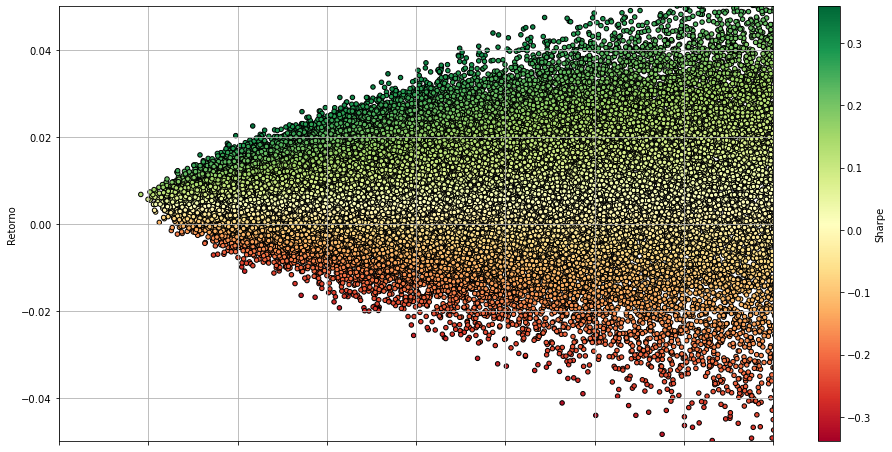

In [205]:
carteira2.plot.scatter(x='Desvio Padrão', y='Retorno', c='Sharpe', figsize=(16,8), grid = True, cmap='RdYlGn', edgecolors= 'black', xlim=(0,0.2), ylim=(-0.05,0.05))

# localizando a carteira com maior sharpe

In [206]:
maior_sharpe= carteira2['Sharpe'].max()
carteira_maior_sharpe=carteira2.loc[carteira2['Sharpe']==maior_sharpe]
#aqui pegamos a matriz transposta para ter uma melhor vizualização dos dados
print(f'carteira com maior sharpe: {carteira_maior_sharpe.T}')

carteira com maior sharpe:                                       72148
Retorno                            0.085323
Desvio Padrão                      0.227417
Sharpe                             0.358914
BHP Group peso                    -1.151980
AGRO3 - Brasil Agro peso           1.096345
JBSS3 - JBS peso                   1.107619
MTZ - MasTec peso                  0.212538
RIO - Rio Tinto peso               1.023441
VIXM - Volatility Index peso      -1.177279
BTG Pactual Tesouro IPCA peso      1.082605
Treasury Yield EUA peso            1.186205
ABEV3 - Ambev peso                 0.230325
BRFS3 - BRF peso                  -0.680458
ELET3 - Eletrobrás peso            0.034326
LPSB3 - Lopes Royal peso          -0.809154
WY - Weyerhauser peso             -0.777619
DIS -Disney peso                   0.682593
TIP - iShares TIPS Bonds ETF peso -1.059507


# criando a função de otimização, de soma dos pesos e encontrando a carteira otima a partir da biblioteca optimize 

In [207]:
def otimizacao(peso, retorno_mesnsal_esperado, cov_carteira, rf):
    #primeiro calculamos o retorno da carteira multiplicando a matriz do peso pela matriz dos retornos esperados
    retorno= np.dot(peso, retorno_mensal_esperado)
    #segundo passo é calcular o desvio padrão da carteira, para isso multiplicamos a patriz de pesos pela matriz de covariãncias e multiplicamos esse resultado pela matriz transposta do peso
    desvio=np.sqrt(np.matmul(peso.T, np.matmul(peso,np.array(cov_carteira))))
    #por fim calculamos o sharpe já considerando o ativo livre de riscos rf
    sharpe=-(retorno-rf)/desvio
    
    return sharpe

def soma_pesos(peso):
    soma=1
    soma=soma - np.sum(peso)
    return soma

restricao= {'type': 'eq', 'fun': soma_pesos}
start= np.random.random(num_acoes)
args= (retorno_mensal_esperado, cov_carteira, rf)
result= op.minimize(otimizacao, start, args=args, constraints=restricao)
pesos= result.x
carteiraOtima= pd.DataFrame({'Ativos': tickers, 'Pesos': pesos})
carteiraOtima.set_index(['Ativos'],inplace=True)
carteiraOtima

,Pesos
Ativos,
BHP Group,-0.003698
AGRO3 - Brasil Agro,0.005387
JBSS3 - JBS,0.006175
MTZ - MasTec,0.004468
RIO - Rio Tinto,0.006222
VIXM - Volatility Index,0.003968
BTG Pactual Tesouro IPCA,0.012787
Treasury Yield EUA,0.967865
ABEV3 - Ambev,0.000375


In [208]:
#calculando o retorno da carteira multiplicando a matriz peso pela matriz dos retornos esperados
retorno_p= np.dot(pesos, retorno_mensal_esperado)
#calculando o desvio padrão da carteira multiplicando a matriz de pesos pela matriz de covariância e multiplicando esse resultado pela matriz transposta do peso
desvio_p= np.sqrt(np.matmul(pesos.T, np.matmul(pesos, np.array(cov_carteira))))
#calculando o índice de sharpe
sharpe_p= (retorno_p-rf)/desvio_p
pd.DataFrame([retorno_p, desvio_p, sharpe_p], ['E[r]', 'Risco','Sharpe'], ['carteira de ativos de risco otima'])

,carteira de ativos de risco otima
E[r],0.006702
Risco,0.002904
Sharpe,1.033721


# Construindo a lac

NameError: name 'carteira_sharpe' is not defined

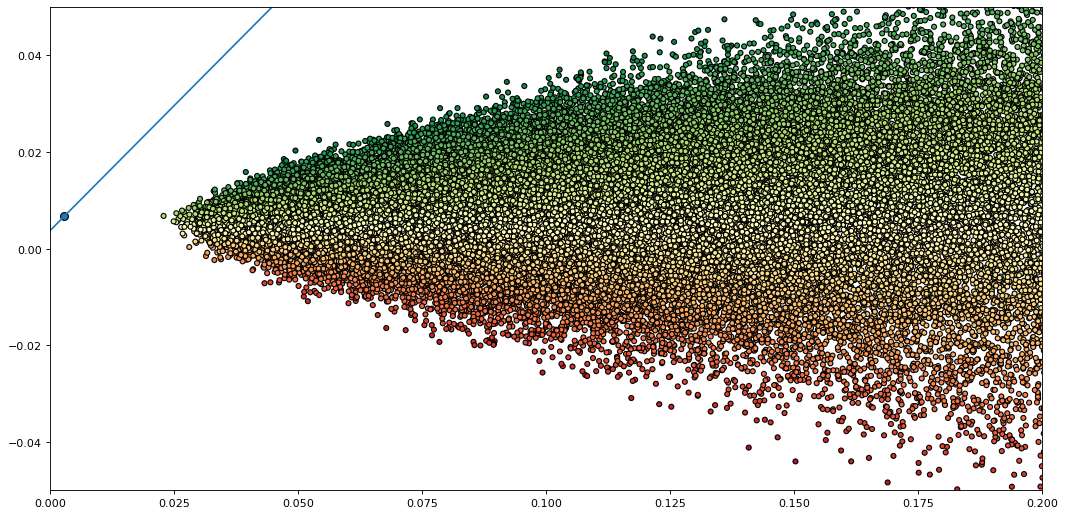

In [209]:
fim= max(carteira2['Desvio Padrão'])
x= np.linspace(0,fim,num_sim)
lac= sharpe_p*x + rf
plt.figure(num="Grafico de retorno por desvio padrão", figsize = (16,8), dpi=80)
plt.scatter(x=carteira2['Desvio Padrão'], y=carteira2['Retorno'], c=carteira2['Sharpe'], s=20, cmap='RdYlGn', edgecolors='black' )
#plt.scatter(x=carteira_sharpe['Desvio Padrão'], y=carteira_sharpe['Retorno'], s=50, edgecolors='black', label='Carteira Otima Otimização')      
plt.scatter(x=desvio_p, y=retorno_p, s=50,edgecolors='black', label='Carteira Otima Otimização')
plt.plot(x,lac,label='LAC')
plt.ylim((-0.05,0.05))
plt.xlim((0,0.2))
plt.yticks(carteira_sharpe['Retorno'])
plt.xticks(carteira_sharpe['Desvio Padrão'])
plt.grid()
plt.legend()


# criando a função utilidade e plotando o gráfico de cada perfil de investidor junto com a LAC

In [221]:
def retorno_utilidade_investidor(A, U):
    sigma= np.linspace(0,max(carteira2['Desvio Padrão']), num_sim)
    retorno= 0.5*A*sigma**2 + U
    return retorno

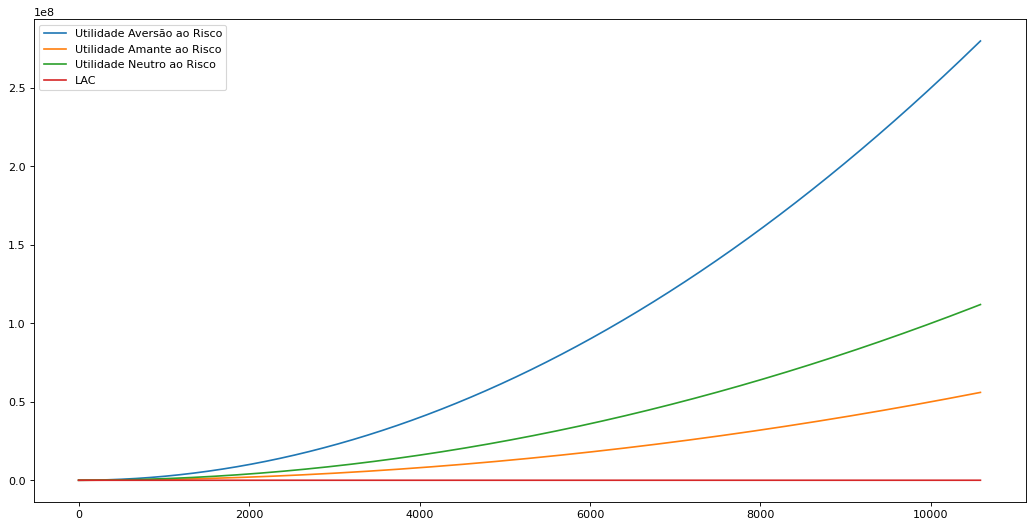

In [222]:
plt.figure(num='Gráfico de retorno por desvio padrão', figsize=(16,8), dpi=80)
U=0.05
plt.plot(x, retorno_utilidade_investidor(5,U), label='Utilidade Aversão ao Risco')
plt.plot(x, retorno_utilidade_investidor(1,U), label='Utilidade Amante ao Risco')
plt.plot(x, retorno_utilidade_investidor(2,U), label='Utilidade Neutro ao Risco')
plt.plot(x,lac,label='LAC')
plt.legend()

# criando a função para encontrar o retorno, desvio e utilidade de cada investidor, e em seguida plotando o gráfico de cada um

In [233]:
def CPO(A):
    y= (retorno_p-rf)/(A*desvio_p**2)
    retorno_c=y*retorno_p + (1-y)*rf
    desvio_c = ((y**2)*desvio_p**2)**(1/2)
    return retorno_c, desvio_c

def utilidade_investidor(A, retorno_c, desvio_c):
    utilidade_c= retorno_c - 0.5*A*desvio_c**2
    return utilidade_c

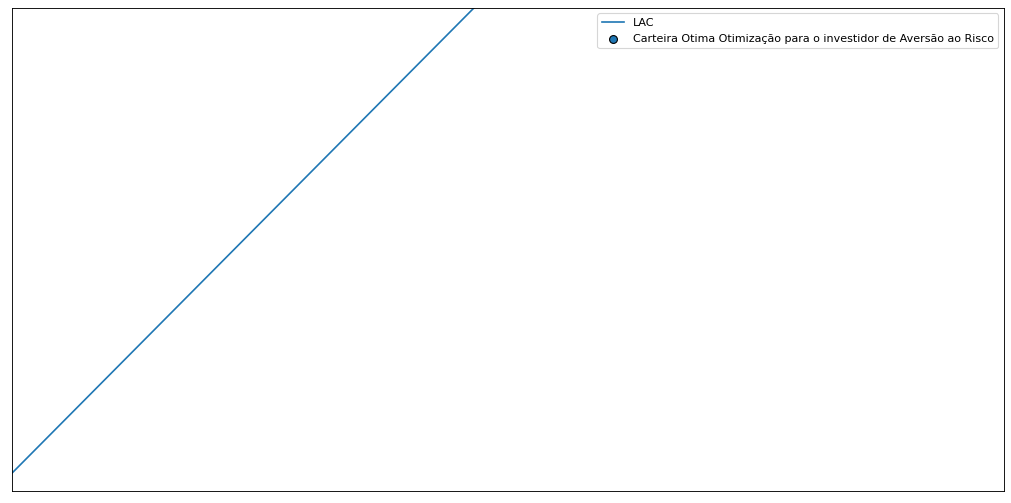

In [235]:
A=5
retorno_c, desvio_c= CPO(A)
utilidade_c= utilidade_investidor( A, retorno_c, desvio_c)
plt.figure(num='Gráfico de retorno por desvio padrão', figsize=(16,8), dpi=80)
plt.plot(x,lac, label='LAC')
#graf.plot(x,retorno_utilidade_investidor(A, utilidade_c), label='Utilidade aversão ao risco')
plt.scatter(x=desvio_c, y=retorno_c, s=50, edgecolors='black', label= 'Carteira Otima Otimização para o investidor de Aversão ao Risco')
plt.yticks([retorno_c])
plt.xticks([desvio_c])
plt.grid()
plt.ylim((0,0.1))
plt.xlim((0,0.2))
plt.legend()

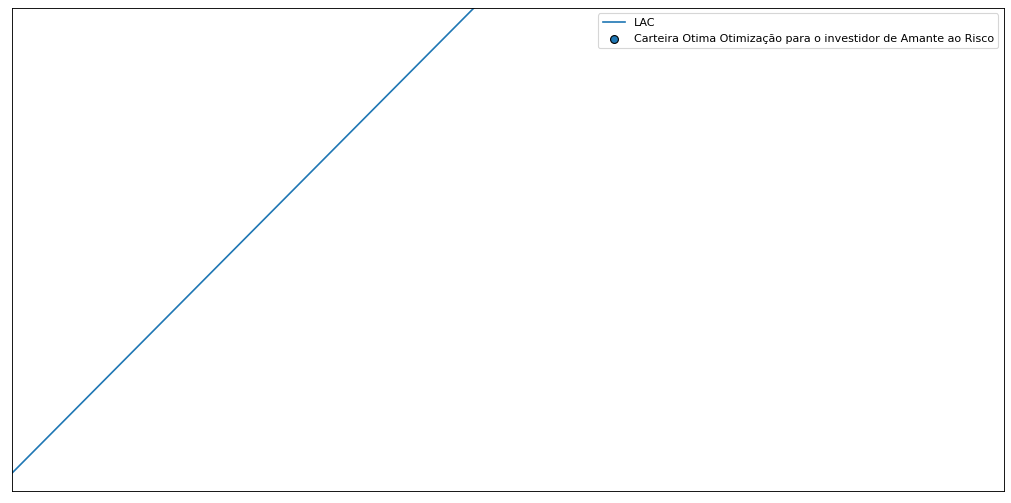

In [237]:
A=1
retorno_c, desvio_c= CPO(A)
utilidade_c= utilidade_investidor( A, retorno_c, desvio_c)
plt.figure(num='Gráfico de retorno por desvio padrão', figsize=(16,8), dpi=80)
plt.plot(x,lac, label='LAC')
#graf.plot(x,retorno_utilidade_investidor(A, utilidade_c), label='Utilidade aversão ao risco')
plt.scatter(x=desvio_c, y=retorno_c, s=50, edgecolors='black', label= 'Carteira Otima Otimização para o investidor de Amante ao Risco')
plt.yticks([retorno_c])
plt.xticks([desvio_c])
plt.grid()
plt.ylim((0,0.1))
plt.xlim((0,0.2))
plt.legend()

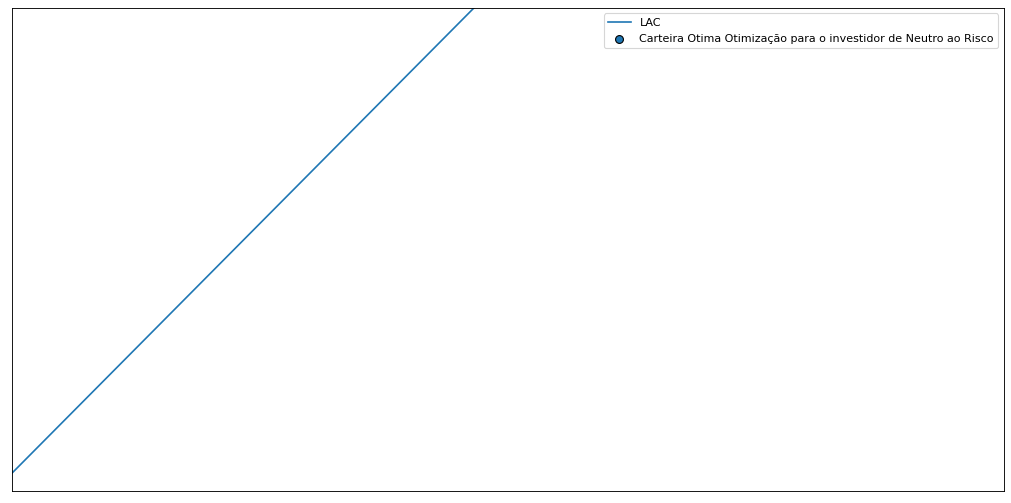

In [239]:
A=2
retorno_c, desvio_c= CPO(A)
utilidade_c= utilidade_investidor( A, retorno_c, desvio_c)
plt.figure(num='Gráfico de retorno por desvio padrão', figsize=(16,8), dpi=80)
plt.plot(x,lac, label='LAC')
#graf.plot(x,retorno_utilidade_investidor(A, utilidade_c), label='Utilidade aversão ao risco')
plt.scatter(x=desvio_c, y=retorno_c, s=50, edgecolors='black', label= 'Carteira Otima Otimização para o investidor de Neutro ao Risco')
plt.yticks([retorno_c])
plt.xticks([desvio_c])
plt.grid()
plt.ylim((0,0.1))
plt.xlim((0,0.2))
plt.legend()